# Discrete Fourier Transform

푸리에 변환식은 다음과 같다.
$$ 
g(k)= \int_{-\infty}^{\infty} f(x) e^{-i k x} dx.
$$
컴퓨터로 푸리에 변환을 계산하기 위해 적분이 아닌 sum을 계산해야 합니다. 이를 이산 푸리에 변환(discrete fourier transform)이라 합니다. 

$N$의 값을 가진 함수 (혹은 데이터) $f(x)$를 변환하는 과정을 생각해봅시다. 
$$ 
g(k) = \int_{0}^{N} f(x) e^{- 2 \pi i k x/N} dx \\
 \approx  \sum_{n=0}^{N-1} f(n ) e^{- 2 \pi i k n /N}.
$$

다음의 과정을 통해 $g(k)$를 구할 수 있으며 마찬가지로 $g(k)$를 알면 역변환을 통해 $f(x)$를 얻을 수 있습니다. 역변환은 다음으로 주어집니다.
$$ 
f_n = \frac{1}{N} \sum_{k=0}^{N-1} g(k) e^{2 \pi i k n/N} 
$$


# Fast Fourier Transform

고속 푸리에 변환은 이산 푸리에 변환의 계산 복잡도를 극적으로 낮추는 알고리듬입니다. 참고로 20세기 중요한 10대 알고리듬에 선정되었을 정도로 중요하고 활용성이 높은 알고리듬입니다.

다음의 간단한 예시를 통해 고속 푸리에 변환이 작동하는 방식을 살짝 엿보기로 합시다. 자세한 설명을 다음 문헌을 참조하세요. 
https://en.wikipedia.org/wiki/Fast_Fourier_transform

$e^{- 2 \pi i/N}$를 $W$로 치환하면 다음처럼 식을 변형할 수 있습니다.
$$g_k  = \sum_{n=0}^{N-1} f(n ) e^{- 2 \pi i k n /N} = \sum_{n=0}^{N-1} f(n ) (e^{- 2 \pi i/N})^{k n}= \sum_{n=0}^{N-1}  W^{k n} f(n ). $$

$N=4$인 간단한 예시를 살펴봅시다. 위의 식을 행렬형태로 고쳐쓰면 다음과 같습니다.

$$
\begin{pmatrix}
g_0 \\ g_1 \\ g_2 \\ g_3
\end{pmatrix}
=
\begin{pmatrix}
W^0 & W^0 & W^0 & W^0  \\
W^0 & W^1 & W^2 & W^3  \\
W^0 & W^2 & W^4 & W^6  \\
W^0 & W^3 & W^6 & W^9  
\end{pmatrix}
\begin{pmatrix}
f_0 \\ f_1 \\ f_2 \\ f_3
\end{pmatrix}
$$

$f_n$을 $n$이 홀수, 짝수인 항으로 묶어주면 다음처럼 됩니다.  

$$
\begin{pmatrix}
g_0 \\ g_1 \\ g_2 \\ g_3
\end{pmatrix}
=
\begin{pmatrix}
W^0 & W^0 & W^0 & W^0  \\
W^0 & W^2 & W^1 & W^3  \\
W^0 & W^4 & W^2 & W^6  \\
W^0 & W^6 & W^3 & W^9  
\end{pmatrix}
\begin{pmatrix}
f_0 \\ f_2 \\ f_1 \\ f_3
\end{pmatrix}
$$

행렬만 살펴보면 다음처럼 쓸 수 있습니다.

$$
\begin{pmatrix}
W^0 & W^0 & W^0 & W^0  \\
W^0 & W^2 & W^1 & W^1 W^2  \\
W^0 & W^4 & W^2 & W^2 W^4  \\
W^0 & W^6 & W^3 & W^3 W^6  
\end{pmatrix}
$$

또한 $W=e^{-2 \pi i /N}$이므로 $W^4= W^0$과 같다. 따라서  
$$
\begin{pmatrix}
W^0 & W^0 & W^0 & W^0  \\
W^0 & W^2 & W^1 & W^1 W^2  \\
W^0 & W^0 & W^2 & W^2 W^0  \\
W^0 & W^2 & W^3 & W^3 W^2  
\end{pmatrix}
$$

위의 행렬은 분해될 수 있으며 따라서 $4x4$행렬 계산이 $2x2$행렬 계산으로 축소됩니다. 큰 $N$에 대해서 다음의 과정을 반복하면 연산 속도가 크게 향상됩니다.

# numpy.fft

* np.fft.fft   
https://numpy.org/doc/stable/reference/routines.fft.html

In [113]:
import numpy as np
import matplotlib.pyplot as plt

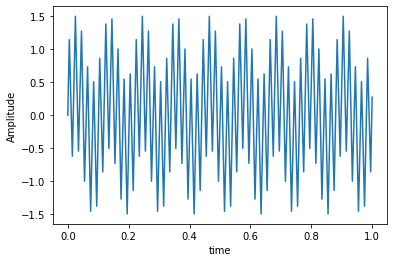

In [145]:
t = np.linspace(0, 1, 201)
s = np.sin(2 * np.pi / T1 * t) + 0.5 * np.sin(2 * np.pi / T2 * t)
T1, T2 = 0.02, 0.11

plt.xlabel("time")
plt.ylabel("Amplitude")
plt.plot(t,s)

In [146]:
fft = np.fft.fft(s)
dt = t[1] - t[0]  # interval 
N = len(t)

<BarContainer object of 100 artists>

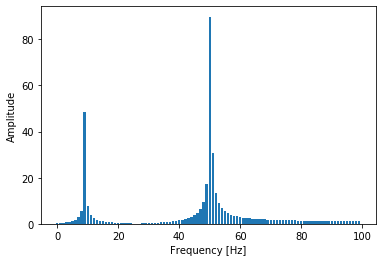

In [161]:
f = np.linspace(0, 1 / dt, N) # frequency
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.bar(f[:N // 2], np.abs(fft)[:N // 2]) 

<BarContainer object of 201 artists>

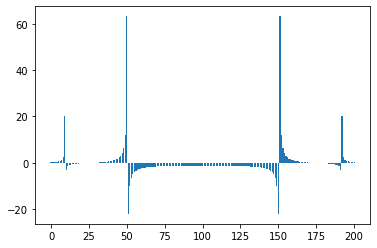

In [163]:
plt.bar(f[:N], fft[:N]) 